### Reading in AOT40 Data

In [1]:
import glob
import numpy as np
import datetime
import julian


# Defining some lists that will be later used to store data in the loop


latl,longl,landcoverl,allvalues,alldates = [],[],[],[],[]


# Creates a list of AOT40 files to be read. Please change this file path to where data is stored

x =glob.glob("D:/AOT/*.txt")


# Loops over list of foles opening each one and reading/saving content to arrays and lists


for item in x:
    
    # Creates two lists that will be used to create a 2-D list containing all values of AOT40
    # Constructed this way to give easy long/lat reference to data 
    
    locationvalues,timevalues= [],[]
    
    # Text file opened and read.
    
    f=open(item, "r")
    content = f.readlines()
    
    # Finds the index (Row number) of where the AOT40 data begins 
    
    indexx = content.index('#time;aot40\n')

    # Hard coded row numbers for relevant infomation. Always the same in all files.
    
    longindex = 13
    latindex = 14
    landcoverindex = 33

    # The data has some weird stuff around it. This strips the stuff and saves what is needed.
    # Data is then appended to lists

    long,lat,landcover = content[longindex].split(':',1)[1],content[latindex].split(':',1)[1],content[landcoverindex].split(':',1)[1]
    long,lat,landcover = long.split('\n',1)[0],lat.split('\n',1)[0],landcover.split(',',1)[0]
    longl.append(long),latl.append(lat),landcoverl.append(landcover)
    
    
    

    # The following loop will read all of the dates and values for AOT40.
    # The default saves the standard python datetime values to lists but code is included to save Julian.
    # Any rubbish around the actual values is stripped and the values saved to a 2-D list. 
   
    for item in content[indexx+1:]:
        Name = item.split(' ',1)
        fmt = '%Y-%m-%d'
        s= Name[0]
        dt = datetime.datetime.strptime(s, fmt)
        jd = julian.to_jd(dt + datetime.timedelta(hours=12), fmt='jd')#
        
        # To save to Julian replace dt with jd
        
        timevalues.append(dt)
        Name2 = Name[1].split(';',1)[1]
        locationvalues.append(float(Name2.split('\n',1)[0]))
    alldates.append(timevalues) 
    allvalues.append(locationvalues)
    f.close()

In [28]:
# This wil be used as the data is 92.6% cropland

print(latl[1],longl[1],landcoverl[1],alldates[1],allvalues[1])

52.2985 0.29092  Croplands: 92.6 % [datetime.datetime(2015, 1, 1, 0, 0), datetime.datetime(2015, 1, 2, 0, 0), datetime.datetime(2015, 1, 3, 0, 0), datetime.datetime(2015, 1, 4, 0, 0), datetime.datetime(2015, 1, 5, 0, 0), datetime.datetime(2015, 1, 6, 0, 0), datetime.datetime(2015, 1, 7, 0, 0), datetime.datetime(2015, 1, 8, 0, 0), datetime.datetime(2015, 1, 9, 0, 0), datetime.datetime(2015, 1, 10, 0, 0), datetime.datetime(2015, 1, 11, 0, 0), datetime.datetime(2015, 1, 12, 0, 0), datetime.datetime(2015, 1, 13, 0, 0), datetime.datetime(2015, 1, 14, 0, 0), datetime.datetime(2015, 1, 15, 0, 0), datetime.datetime(2015, 1, 16, 0, 0), datetime.datetime(2015, 1, 17, 0, 0), datetime.datetime(2015, 1, 18, 0, 0), datetime.datetime(2015, 1, 19, 0, 0), datetime.datetime(2015, 1, 20, 0, 0), datetime.datetime(2015, 1, 21, 0, 0), datetime.datetime(2015, 1, 22, 0, 0), datetime.datetime(2015, 1, 23, 0, 0), datetime.datetime(2015, 1, 24, 0, 0), datetime.datetime(2015, 1, 25, 0, 0), datetime.datetime(2015,

In [10]:
x =glob.glob("D:/DailyMinTemp/*.nc")

### Reading in temp data

In [13]:
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


longl,latl = np.array(longl),np.array(latl)

longl,latl = longl.astype(np.float), latl.astype(np.float)

longfinal,latfinal,posxs,posys,itenz,itenz2 = [],[],[],[],[],[]


dataset = Dataset('D:/DailyMinTemp/tasmin_hadukgrid_uk_1km_day_20000101-20000131.nc')
Temps = dataset.variables['tasmin'][:]
lat = dataset.variables['latitude'][:]
long = dataset.variables['longitude'][:]



for posx,(longlist,latlist) in enumerate(zip(long,lat)):
    for posy,(item1,item2) in enumerate(zip(longlist,latlist)):
        if item1 > (longl[1] - 0.1) and item1 < (longl[1] +0.1) and item2 > (latl[1] - 0.1) and item2 < (latl[1] +0.1):
            itenz.append(item1)
            itenz2.append(item2)
            posys.append(posy)
            posxs.append(posx)
                

z = []
for stuff,stuff2 in zip(posxs,posys):
    z.append(Temps[1,stuff,stuff2])


### Plotting the data over a map

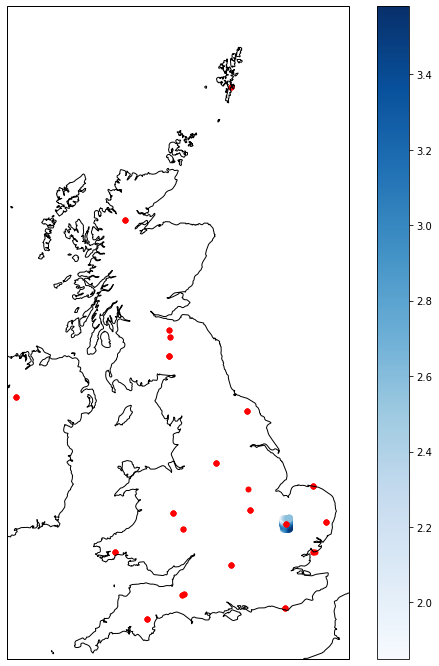

In [19]:
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy as cp
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import numpy as np
import matplotlib.animation as animation
from matplotlib import ticker


cm = plt.cm.get_cmap('Blues')

fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(projection=ccrs.OSGB())
ax.scatter(longl,latl,s=100,color='red', marker='.',transform=  ccrs.PlateCarree(),zorder =1)
sc = ax.scatter(itenz,itenz2,transform=  ccrs.PlateCarree(),zorder =0,c=z,cmap=cm)
ax.coastlines(resolution='10m')
#cf = plt.contourf(posxs,posys,z,60,transform = ccrs.PlateCarree(),zorder = 0)




# Adds a colour bar to the side of the plot.

fig.colorbar(sc)

plt.show()

### Averaging the data from shaded region and comparing with AOT40

In [33]:
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x =glob.glob("D:/DailyMinTemp/tasmin_hadukgrid_uk_1km_day_2015*.nc")
longl,latl = np.array(longl),np.array(latl)

longl,latl = longl.astype(np.float), latl.astype(np.float)

alltempsforplotting = []

for file in x:

    longfinal,latfinal,posxs,posys,itenz,itenz2 = [],[],[],[],[],[]

    dataset = Dataset(file)
    Temps = dataset.variables['tasmin'][:]
    lat = dataset.variables['latitude'][:]
    long = dataset.variables['longitude'][:]


    for counter in range(0,len(Temps)):
        for posx,(longlist,latlist) in enumerate(zip(long,lat)):
            for posy,(item1,item2) in enumerate(zip(longlist,latlist)):
                if item1 > (longl[1] - 0.1) and item1 < (longl[1] +0.1) and item2 > (latl[1] - 0.1) and item2 < (latl[1] +0.1):
                    itenz.append(item1)
                    itenz2.append(item2)
                    posys.append(posy)
                    posxs.append(posx)


        z = []
        for stuff,stuff2 in zip(posxs,posys):
            z.append(Temps[counter,stuff,stuff2])


        z = np.array(z)
        mu = np.mean(z)
        print(mu)
        alltempsforplotting.append(mu)
        

0.45576701955656634
6.310382378259018
2.1022183042225695
-3.1554385367773268
-2.4155486671338666
4.814644242853277
-0.06474461682133568
3.4115973490097082
4.674663232819298
10.403118395118517
2.557541477995107
3.412653303440652
6.335057613601652
1.7152357829468723
2.0660552422470198
3.5263604635817902
-1.385922157259795
-0.5280501169810969
-2.475788588177188
-4.277818096357183
-3.0696196076503446
-1.1762398430270116
-5.239130536183404
-2.908213299379264
0.09484118015973514
2.224269949045708
2.0112317808248
4.031506884437713
1.4319920547512683
-0.273404951494912
-0.8837291026588223
0.7091891932841387
-2.670040702638818
-1.7951294895995165
-0.5310210919912985
0.2516168463671324
-1.4459692761101455
-2.0885151641993644
0.9365853322285265
-0.6668385965931699
-1.9067349720644997
-0.03836602661082348
2.389414273273248
0.8111729302779715
4.9276132387764
2.817309747417857
2.995140687183226
-0.16699789915823743
-0.23499417825321756
3.3518901815514086
2.898355402092381
0.6882119801230735
-1.77033

### Plotting both graphs to check for correlation

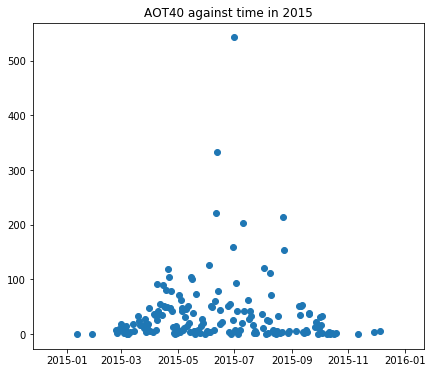

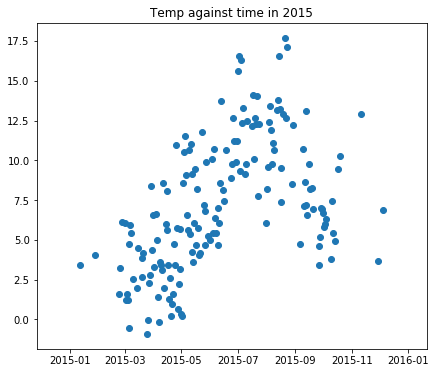

[[1.         0.16684669]
 [0.16684669 1.        ]]


In [42]:
v = allvalues[1][0:365]
t = alldates[1][0:365]

newv,newt,newtemp = [],[],[]


for item,item2,item3 in zip(t,v,alltempsforplotting):
    if item2 != -999 and item2 != 0:
        newv.append(item2)
        newt.append(item)
        newtemp.append(item3)
        
v,t,temps = np.array(newv),np.array(newt),np.array(newtemp)



fig = plt.figure(figsize=(7,6))
plt.title('AOT40 against time in 2015')
plt.scatter(t,v,label = 'AOT40')
plt.show()


fig = plt.figure(figsize=(7,6))
plt.title('Temp against time in 2015')
plt.scatter(t,temps,label = 'Min Temp')
plt.show()

print(np.corrcoef(v,temps))